# Table of Contents
 <p><div class="lev1"><a href="#Problem-Overview"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Overview</a></div><div class="lev1"><a href="#Load-Data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></div><div class="lev1"><a href="#Add-and-Remove-Columns"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add and Remove Columns</a></div><div class="lev1"><a href="#Filter-Data"><span class="toc-item-num">4&nbsp;&nbsp;</span>Filter Data</a></div><div class="lev1"><a href="#More-info-on-columns"><span class="toc-item-num">5&nbsp;&nbsp;</span>More info on columns</a></div><div class="lev1"><a href="#Data-Reshaping"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Reshaping</a></div><div class="lev1"><a href="#Time-Series"><span class="toc-item-num">7&nbsp;&nbsp;</span>Time Series</a></div>

# Problem Overview

# Load Data

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Load csv data into a pandas dataframe  
Dates column is handled by dateparser

In [2]:
%time train = pd.read_csv(r'data/train.csv', parse_dates=['Dates'])
%time test = pd.read_csv(r'data/test.csv', parse_dates=['Dates'])

CPU times: user 3.63 s, sys: 259 ms, total: 3.88 s
Wall time: 7.15 s
CPU times: user 2.95 s, sys: 205 ms, total: 3.16 s
Wall time: 4.19 s


Let's look at the first 5 elements

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Now let's get some description of the features

In [4]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427


*TO_BE_COMPLETED*   
More details about the columns  
Missing data detection

Now let's check the ***test data***

In [5]:
test.describe(include='all')

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
count,884262.000000,884262,884262,884262,884262,884262.000000,884262.000000
unique,NaN,392173,7,10,23184,NaN,NaN
top,NaN,2010-01-01 00:01:00,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN
freq,NaN,150,134703,157456,26984,NaN,NaN
first,NaN,2003-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-10 23:59:00,NaN,NaN,NaN,NaN,NaN
mean,442130.500000,NaN,NaN,NaN,NaN,-122.422693,37.771476
std,255264.596206,NaN,NaN,NaN,NaN,0.030985,0.484824
min,0.000000,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,221065.250000,NaN,NaN,NaN,NaN,-122.433069,37.752374


*Category* is abviously not there given that it is the output of the model.  
*Resolution* is also missing from the test data. We will need to remove it from the train set.

# Add and Remove Columns

Let's remove the *Resolution* column

In [6]:
train.drop(['Resolution'],axis=1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


Let's check the remaining columns now

In [7]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

This is a common pattern in pandas.   
Destructive operations leads to copy of data.  
In order to prevent this one solution is:

In [8]:
train.drop(['Resolution'],axis=1,inplace=True)

Now let's try to add a Year column out of the Dates feature

In [9]:
train.Dates

0        2015-05-13 23:53:00
1        2015-05-13 23:53:00
2        2015-05-13 23:33:00
3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
5        2015-05-13 23:30:00
6        2015-05-13 23:30:00
7        2015-05-13 23:30:00
8        2015-05-13 23:00:00
9        2015-05-13 23:00:00
10       2015-05-13 22:58:00
11       2015-05-13 22:30:00
12       2015-05-13 22:30:00
13       2015-05-13 22:06:00
14       2015-05-13 22:00:00
15       2015-05-13 22:00:00
16       2015-05-13 22:00:00
17       2015-05-13 21:55:00
18       2015-05-13 21:40:00
19       2015-05-13 21:30:00
20       2015-05-13 21:30:00
21       2015-05-13 21:17:00
22       2015-05-13 21:11:00
23       2015-05-13 21:11:00
24       2015-05-13 21:10:00
25       2015-05-13 21:00:00
26       2015-05-13 21:00:00
27       2015-05-13 21:00:00
28       2015-05-13 21:00:00
29       2015-05-13 20:56:00
                 ...        
878019   2003-01-06 02:37:00
878020   2003-01-06 02:32:00
878021   2003-01-06 02:24:00
878022   2003-

In order to create a new column out of Date we can use the map function.   
We pass a function which will be used to do the transformation elementwise.

In [10]:
%time  years = train.Dates.map(lambda d: d.year)
years

CPU times: user 5.41 s, sys: 181 ms, total: 5.6 s
Wall time: 5.57 s


0         2015
1         2015
2         2015
3         2015
4         2015
5         2015
6         2015
7         2015
8         2015
9         2015
10        2015
11        2015
12        2015
13        2015
14        2015
15        2015
16        2015
17        2015
18        2015
19        2015
20        2015
21        2015
22        2015
23        2015
24        2015
25        2015
26        2015
27        2015
28        2015
29        2015
          ... 
878019    2003
878020    2003
878021    2003
878022    2003
878023    2003
878024    2003
878025    2003
878026    2003
878027    2003
878028    2003
878029    2003
878030    2003
878031    2003
878032    2003
878033    2003
878034    2003
878035    2003
878036    2003
878037    2003
878038    2003
878039    2003
878040    2003
878041    2003
878042    2003
878043    2003
878044    2003
878045    2003
878046    2003
878047    2003
878048    2003
Name: Dates, dtype: int64

Now we can push add the column to the existing dataframe

In [11]:
train['Year'] = years

In [12]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year
count,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000,878049.000000
unique,389257,39,879,7,10,23228,NaN,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,800 Block of BRYANT ST,NaN,NaN,NaN
freq,185,174900,60022,133734,157182,26533,NaN,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020,2008.712046
std,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893,3.631194
min,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879,2003.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427,2006.000000


Pandas provides helper function to manipulate both string and dates column  
These functions are both convienient and more optimised

In [ ]:
%time train.Dates.dt.

In [ ]:
%time train.Category.str.

Now let's create some extra columns: Month, Day, DayOfWeek and Hour

In [14]:
%time train['Month'] = train.Dates.dt.month
%time train['Day'] = train.Dates.dt.day
%time train['DayOfWeek'] = train.Dates.dt.dayofweek
%time train['Hour'] = train.Dates.dt.hour

CPU times: user 93.7 ms, sys: 9.84 ms, total: 104 ms
Wall time: 103 ms
CPU times: user 96.1 ms, sys: 10 ms, total: 106 ms
Wall time: 106 ms
CPU times: user 136 ms, sys: 24.5 ms, total: 160 ms
Wall time: 160 ms
CPU times: user 96.4 ms, sys: 9.82 ms, total: 106 ms
Wall time: 106 ms


In [15]:
train.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
count,878049,878049,878049,878049.000000,878049,878049,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
unique,389257,39,879,NaN,10,23228,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NaN,SOUTHERN,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN,NaN
freq,185,174900,60022,NaN,157182,26533,NaN,NaN,NaN,NaN,NaN,NaN
first,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.992691,NaN,NaN,-122.422616,37.771020,2008.712046,6.436509,15.570623,13.412655
std,NaN,NaN,NaN,1.972023,NaN,NaN,0.030354,0.456893,3.631194,3.428972,8.783005,6.549573
min,NaN,NaN,NaN,0.000000,NaN,NaN,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,NaN,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000


# Filter Data

Let's filter data on a single year

In [16]:
train.Year==2014

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
878019    False
878020    False
878021    False
878022    False
878023    False
878024    False
878025    False
878026    False
878027    False
878028    False
878029    False
878030    False
878031    False
878032    False
878033    False
878034    False
878035    False
878036    False
878037    False
878038    False
878039    False
878040    False
878041    False
878042    False
878043    False
878044    False
878045    False
878046    False
878047    False
878048    False
Name: Year, dtype: bool

now let's apply this boolean vector to the dataframe.  
This filters out all **False** lines.

In [17]:
train[train.Year==2014]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
27584,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,6,MISSION,4100 Block of 18TH ST,-122.435563,37.760801,2014,12,28,23
27585,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,NORTHERN,1900 Block of LOMBARD ST,-122.433575,37.800037,2014,12,28,23
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23
27587,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,6,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23
27588,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,6,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23
27589,2014-12-28 23:30:00,ASSAULT,THREATS AGAINST LIFE,6,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23
27590,2014-12-28 23:30:00,WARRANTS,WARRANT ARREST,6,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23
27591,2014-12-28 23:30:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",6,NORTHERN,0 Block of ROSE ST,-122.421702,37.773641,2014,12,28,23
27592,2014-12-28 23:28:00,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",6,BAYVIEW,800 Block of JAMESTOWN AV,-122.391150,37.717223,2014,12,28,23
27593,2014-12-28 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,CENTRAL,POST ST / JONES ST,-122.413358,37.787664,2014,12,28,23


List all **unique** categories

In [18]:
train.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [19]:
train[train.Category=='VEHICLE THEFT']

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,13,23
46,2015-05-13 20:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,2,INGLESIDE,0 Block of CRESCENT AV,-122.423702,37.735233,2015,5,13,20
59,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,2,CENTRAL,0 Block of SANSOME ST,-122.400720,37.790712,2015,5,13,19
60,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,CENTRAL,0 Block of SANSOME ST,-122.400720,37.790712,2015,5,13,19
73,2015-05-13 19:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,MISSION,26TH ST / GUERRERO ST,-122.422572,37.748774,2015,5,13,19
133,2015-05-13 17:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,MISSION,16TH ST / SANCHEZ ST,-122.430883,37.764373,2015,5,13,17
146,2015-05-13 16:30:00,VEHICLE THEFT,STOLEN TRUCK,2,NORTHERN,SUTTER ST / WEBSTER ST,-122.431553,37.786304,2015,5,13,16
158,2015-05-13 15:58:00,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,2,NORTHERN,2400 Block of CALIFORNIA ST,-122.434689,37.788854,2015,5,13,15
159,2015-05-13 15:58:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,NORTHERN,2400 Block of CALIFORNIA ST,-122.434689,37.788854,2015,5,13,15


And filter on more than one category

In [20]:
train[train.Category.isin(['VEHICLE THEFT','NON-CRIMINAL'])]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,13,23
14,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,2,BAYVIEW,200 Block of WILLIAMS AV,-122.397744,37.729935,2015,5,13,22
15,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,2,BAYVIEW,0 Block of MENDELL ST,-122.383692,37.743189,2015,5,13,22
19,2015-05-13 21:30:00,NON-CRIMINAL,FOUND PROPERTY,2,TENDERLOIN,100 Block of JONES ST,-122.412250,37.782556,2015,5,13,21
23,2015-05-13 21:11:00,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",2,TENDERLOIN,100 Block of JONES ST,-122.412250,37.782556,2015,5,13,21
25,2015-05-13 21:00:00,NON-CRIMINAL,LOST PROPERTY,2,TENDERLOIN,300 Block of OFARRELL ST,-122.410509,37.786043,2015,5,13,21
31,2015-05-13 20:50:00,NON-CRIMINAL,"CIVIL SIDEWALKS, CITATION",2,MISSION,400 Block of CASTRO ST,-122.435150,37.761760,2015,5,13,20
40,2015-05-13 20:23:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",2,SOUTHERN,700 Block of MARKET ST,-122.405295,37.786307,2015,5,13,20
46,2015-05-13 20:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,2,INGLESIDE,0 Block of CRESCENT AV,-122.423702,37.735233,2015,5,13,20


Now we can filter on more than one condition using **&** for **AND** and **|** for an **OR**

In [21]:
train[(train.Year==2014)&(train.Category=='VEHICLE THEFT')]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23
27599,2014-12-28 23:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,400 Block of PARIS ST,-122.434948,37.721561,2014,12,28,23
27621,2014-12-28 21:20:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,PARK,1200 Block of PIERCE ST,-122.435649,37.781493,2014,12,28,21
27623,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,600 Block of PRECITA AV,-122.408196,37.748094,2014,12,28,21
27624,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN TRUCK,6,NORTHERN,ELLIS ST / LAGUNA ST,-122.427587,37.782985,2014,12,28,21
27630,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,CORNWALL ST / 6TH AV,-122.462418,37.784907,2014,12,28,21
27632,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,20TH ST / ARKANSAS ST,-122.398219,37.759909,2014,12,28,21
27634,2014-12-28 20:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,2500 Block of MCALLISTER ST,-122.453892,37.775691,2014,12,28,20
27659,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,FAIRFAX AV / KEITH ST,-122.381561,37.738124,2014,12,28,19
27666,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN TRUCK,6,TARAVAL,3100 Block of LINCOLN WY,-122.491724,37.764713,2014,12,28,19


Another way of doing it is using the **query** method

In [22]:
train.query("(Year==2014)&(Category=='VEHICLE THEFT')")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23
27599,2014-12-28 23:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,400 Block of PARIS ST,-122.434948,37.721561,2014,12,28,23
27621,2014-12-28 21:20:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,PARK,1200 Block of PIERCE ST,-122.435649,37.781493,2014,12,28,21
27623,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,600 Block of PRECITA AV,-122.408196,37.748094,2014,12,28,21
27624,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN TRUCK,6,NORTHERN,ELLIS ST / LAGUNA ST,-122.427587,37.782985,2014,12,28,21
27630,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,CORNWALL ST / 6TH AV,-122.462418,37.784907,2014,12,28,21
27632,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,20TH ST / ARKANSAS ST,-122.398219,37.759909,2014,12,28,21
27634,2014-12-28 20:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,2500 Block of MCALLISTER ST,-122.453892,37.775691,2014,12,28,20
27659,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,FAIRFAX AV / KEITH ST,-122.381561,37.738124,2014,12,28,19
27666,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN TRUCK,6,TARAVAL,3100 Block of LINCOLN WY,-122.491724,37.764713,2014,12,28,19


we can also usual the conditional python constructs: **and** and **or**

In [23]:
train.query("Year==2014 and Category=='VEHICLE THEFT'")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,CENTRAL,500 Block of GEARY ST,-122.412777,37.786834,2014,12,28,23
27599,2014-12-28 23:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,400 Block of PARIS ST,-122.434948,37.721561,2014,12,28,23
27621,2014-12-28 21:20:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,PARK,1200 Block of PIERCE ST,-122.435649,37.781493,2014,12,28,21
27623,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,INGLESIDE,600 Block of PRECITA AV,-122.408196,37.748094,2014,12,28,21
27624,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN TRUCK,6,NORTHERN,ELLIS ST / LAGUNA ST,-122.427587,37.782985,2014,12,28,21
27630,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,CORNWALL ST / 6TH AV,-122.462418,37.784907,2014,12,28,21
27632,2014-12-28 21:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,20TH ST / ARKANSAS ST,-122.398219,37.759909,2014,12,28,21
27634,2014-12-28 20:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,RICHMOND,2500 Block of MCALLISTER ST,-122.453892,37.775691,2014,12,28,20
27659,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,6,BAYVIEW,FAIRFAX AV / KEITH ST,-122.381561,37.738124,2014,12,28,19
27666,2014-12-28 19:00:00,VEHICLE THEFT,STOLEN TRUCK,6,TARAVAL,3100 Block of LINCOLN WY,-122.491724,37.764713,2014,12,28,19


What if want to filter on the dataframe index?  
For this we can use **loc**:

Let's get up to element number **3**:

In [24]:
train.loc[:3]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23


The last 3 elements

In [25]:
train[-3:]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,0,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",0,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",0,BAYVIEW,1800 Block of NEWCOMB AV,-122.394926,37.738212,2003,1,6,0


Every other element:

In [26]:
train.loc[::2]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,2,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,2015,5,13,23
10,2015-05-13 22:58:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,2,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,5,13,22
12,2015-05-13 22:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",2,TENDERLOIN,TURK ST / JONES ST,-122.412414,37.783004,2015,5,13,22
14,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,2,BAYVIEW,200 Block of WILLIAMS AV,-122.397744,37.729935,2015,5,13,22
16,2015-05-13 22:00:00,ROBBERY,"ROBBERY, ARMED WITH A KNIFE",2,TENDERLOIN,EDDY ST / JONES ST,-122.412597,37.783932,2015,5,13,22
18,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,2,BAYVIEW,MENDELL ST / HUDSON AV,-122.386401,37.738983,2015,5,13,21


Selecting the columns and/or reoding them is simple:

In [27]:
train[['X','Y','Category']].T

,0,1,2,3,4,5,6,7,8,9,...,878039,878040,878041,878042,878043,878044,878045,878046,878047,878048
X,-122.426,-122.426,-122.424,-122.427,-122.439,-122.403,-122.423,-122.371,-122.508,-122.419,...,-122.421,-122.414,-122.473,-122.39,-122.39,-122.459,-122.447,-122.403,-122.391,-122.395
Y,37.7746,37.7746,37.8004,37.8009,37.7715,37.7134,37.7251,37.7276,37.7766,37.8078,...,37.7906,37.7517,37.7826,37.7306,37.7306,37.7141,37.7319,37.7803,37.7806,37.7382
Category,WARRANTS,OTHER OFFENSES,OTHER OFFENSES,LARCENY/THEFT,LARCENY/THEFT,LARCENY/THEFT,VEHICLE THEFT,VEHICLE THEFT,LARCENY/THEFT,LARCENY/THEFT,...,OTHER OFFENSES,ASSAULT,OTHER OFFENSES,ASSAULT,OTHER OFFENSES,ROBBERY,LARCENY/THEFT,LARCENY/THEFT,VANDALISM,FORGERY/COUNTERFEITING


# More info on columns

List of all categories:

In [28]:
train.Category.unique()#.size

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

How many incident per category?

In [29]:
train.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

let's draw a horizontal bar chart for this

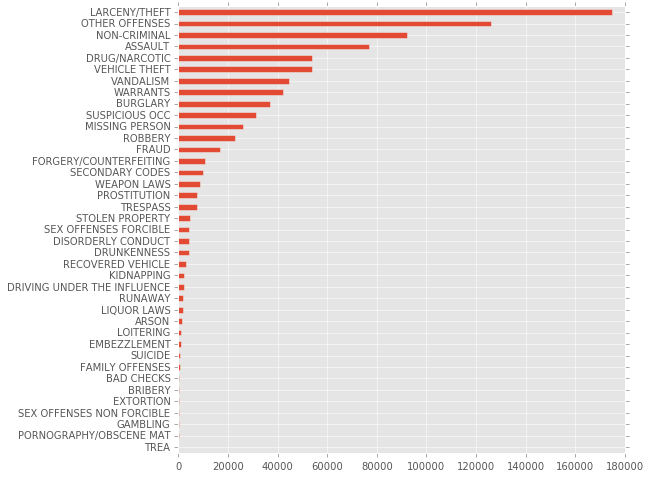

In [30]:
train.Category.value_counts(ascending=True).plot(kind='barh',figsize=(8,8))

What about the spacial **Y** distribution

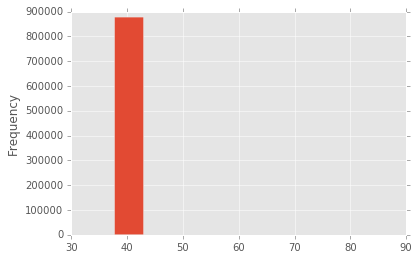

In [31]:
train.Y.plot.hist(bins=10)

Some outliers data is around **90** 
Let's get rid of data Y>40

In [32]:
print('#{} incident happens for Y over 40'.format(len(train[train.Y>40])))
train=train[train.Y<40]

#67 incident happens for Y over 40


Now let's check **Y** distribution again

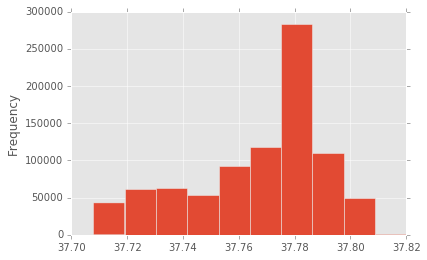

In [33]:
train.Y.plot.hist()

Same thing for **X**

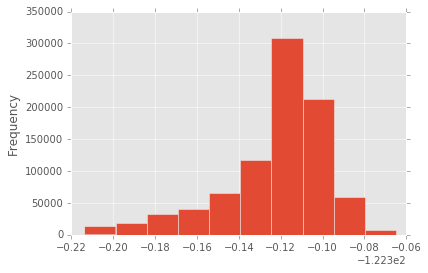

In [34]:
train.X.plot.hist()

# Data Reshaping

Think of it like tweaking data using Pivot Table in Excel

In [35]:
yearly = train.pivot_table(index='Month',columns=['Year'],values='Category',aggfunc=np.count_nonzero)
yearly

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,
1,5831.0,5937.0,5668.0,5896.0,5094.0,5182.0,5272.0,5179.0,6130.0,5987.0,5712.0,5780.0,5866.0
2,5963.0,5626.0,5251.0,5537.0,5093.0,5284.0,5237.0,5063.0,5029.0,5367.0,5694.0,5659.0,6008.0
3,6099.0,7259.0,5448.0,5418.0,5209.0,5974.0,6580.0,4997.0,5071.0,5341.0,5830.0,6240.0,6851.0
4,6757.0,6987.0,5585.0,5524.0,5336.0,6028.0,6472.0,4890.0,5123.0,5618.0,6615.0,6549.0,6609.0
5,7024.0,6862.0,6426.0,6177.0,6253.0,6597.0,6355.0,5708.0,5742.0,6563.0,6924.0,6759.0,2250.0
6,6045.0,5611.0,6134.0,6393.0,5984.0,5556.0,4543.0,5888.0,5915.0,6024.0,6797.0,5992.0,NaN
7,5502.0,5679.0,6511.0,6246.0,5894.0,5631.0,4960.0,6207.0,5895.0,5692.0,5944.0,5808.0,NaN
8,5798.0,6435.0,5421.0,5523.0,5331.0,5275.0,6199.0,5758.0,5056.0,5481.0,6103.0,6147.0,NaN
9,6703.0,6361.0,5423.0,5312.0,5509.0,6367.0,6671.0,5453.0,5278.0,5585.0,6649.0,6667.0,NaN


Let's draw it

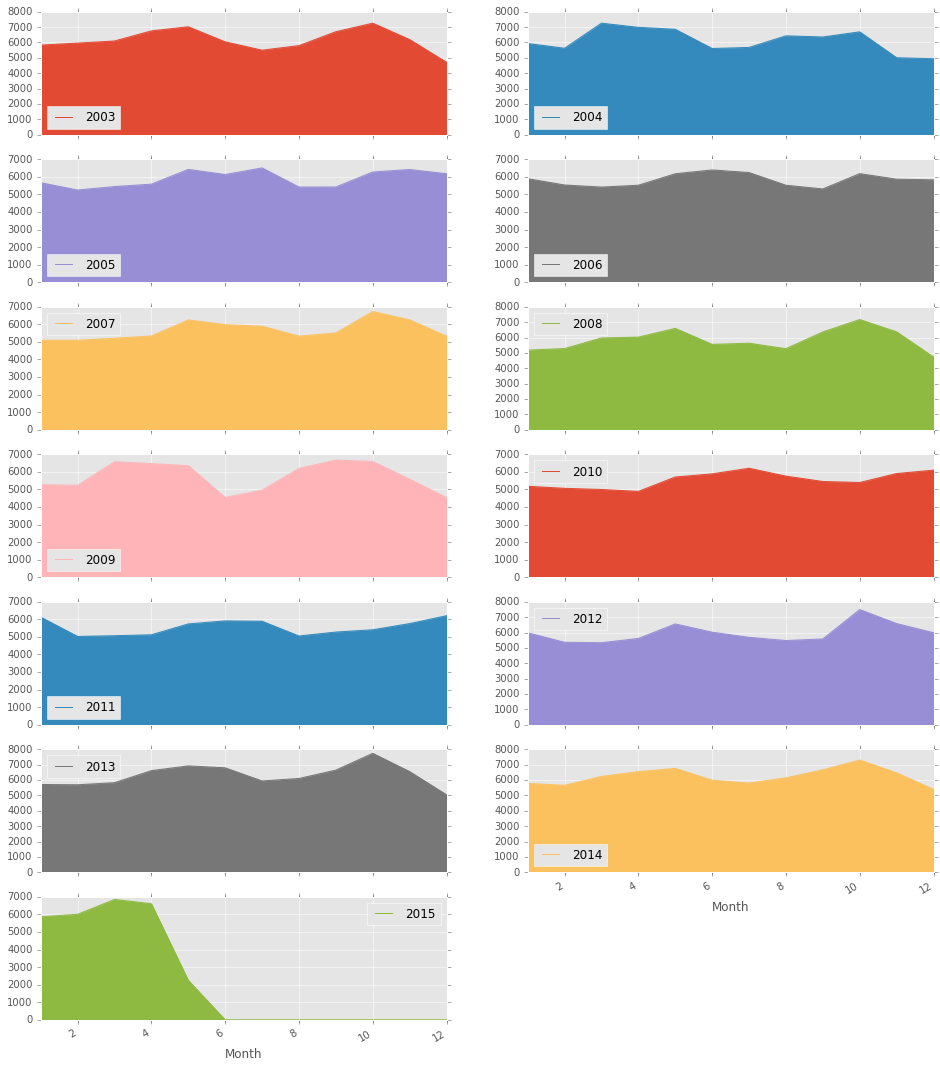

In [36]:
yearly.plot.area(subplots=True,figsize=(16,20),layout=(7, 2));pass

A more powerfull way for reshaping data is the **groupby** method

In [37]:
monthly = train.groupby(['Year','Month','Category']).agg({'Category':np.count_nonzero})
monthly

Category
Year Month Category                             
2003 1     ARSON                               9
           ASSAULT                           507
           BAD CHECKS                          5
           BURGLARY                          223
           DISORDERLY CONDUCT                 45
           DRIVING UNDER THE INFLUENCE        14
           DRUG/NARCOTIC                     455
           DRUNKENNESS                        35
           EMBEZZLEMENT                       11
           FAMILY OFFENSES                     4
           FORGERY/COUNTERFEITING             78
           FRAUD                             101
           KIDNAPPING                          8
           LARCENY/THEFT                     962
           LIQUOR LAWS                         9
           LOITERING                           7
           MISSING PERSON                    157
           NON-CRIMINAL                      455
           OTHER OFFENSES                    966
           PROSTITUTION                       63
           ROBBERY                           120
           RUNAWAY                            17
           SECONDARY CODES                    46
           SEX OFFENSES FORCIBLE              31
           SEX OFFENSES NON FORCIBLE           1
           STOLEN PROPERTY                    28
           SUICIDE                             3
           SUSPICIOUS OCC                    162
           TRESPASS                           69
           VANDALISM                         258
...                                          ...
2015 4     WEAPON LAWS                        79
     5     ARSON                               5
           ASSAULT                           183
           BRIBERY                             1
           BURGLARY                          104
           DISORDERLY CONDUCT                  3
           DRIVING UNDER THE INFLUENCE         7
           DRUG/NARCOTIC                      48
           DRUNKENNESS                         8
           FAMILY OFFENSES                     1
           FORGERY/COUNTERFEITING              9
           FRAUD                              45
           KIDNAPPING                         10
           LARCENY/THEFT                     619
           LIQUOR LAWS                         3
           MISSING PERSON                     71
           NON-CRIMINAL                      273
           OTHER OFFENSES                    261
           PROSTITUTION                        2
           ROBBERY                            58
           RUNAWAY                             2
           SECONDARY CODES                    29
           SEX OFFENSES FORCIBLE              19
           STOLEN PROPERTY                    10
           SUSPICIOUS OCC                     75
           TRESPASS                           22
           VANDALISM                         108
           VEHICLE THEFT                     159
           WARRANTS                           88
           WEAPON LAWS                        27

[5249 rows x 1 columns]

**unstack**

In [38]:
monthly.unstack('Category')

Category                                                         \
Category      ARSON ASSAULT BAD CHECKS BRIBERY BURGLARY DISORDERLY CONDUCT   
Year Month                                                                   
2003 1          9.0   507.0        5.0     NaN    223.0               45.0   
     2         11.0   490.0        1.0     1.0    231.0               32.0   
     3         15.0   579.0        3.0     NaN    270.0               32.0   
     4          8.0   545.0        9.0     2.0    303.0               39.0   
     5         15.0   636.0        7.0     NaN    305.0               34.0   
     6         18.0   536.0        7.0     1.0    206.0               22.0   
     7         15.0   484.0        5.0     NaN    211.0               37.0   
     8         10.0   478.0        5.0     1.0    238.0               27.0   
     9         14.0   620.0        6.0     1.0    219.0               43.0   
     10        18.0   667.0       10.0     3.0    325.0               48.0   
     11        13.0   584.0        6.0     NaN    262.0               30.0   
     12         8.0   429.0        5.0     3.0    224.0               18.0   
2004 1         12.0   480.0        4.0     2.0    243.0               23.0   
     2         11.0   498.0        3.0     3.0    226.0               30.0   
     3         14.0   677.0        8.0     2.0    327.0               62.0   
     4          9.0   614.0        4.0     2.0    309.0               41.0   
     5         14.0   635.0        6.0     1.0    307.0               54.0   
     6         13.0   496.0        NaN     1.0    220.0               30.0   
     7         19.0   486.0        2.0     2.0    222.0               37.0   
     8         18.0   557.0        4.0     2.0    275.0               31.0   
     9          8.0   542.0        1.0     NaN    272.0               20.0   
     10        15.0   643.0        2.0     3.0    327.0               43.0   
     11         9.0   445.0        3.0     NaN    303.0               22.0   
     12         5.0   393.0        5.0     NaN    299.0               24.0   
2005 1         11.0   413.0        6.0     2.0    316.0               40.0   
     2          9.0   420.0        4.0     NaN    263.0               21.0   
     3          6.0   426.0        4.0     1.0    291.0               37.0   
     4          9.0   487.0        2.0     NaN    262.0               23.0   
     5          8.0   547.0        4.0     4.0    312.0               31.0   
     6          8.0   498.0        2.0     2.0    316.0               37.0   
...             ...     ...        ...     ...      ...                ...   
2012 12        10.0   461.0        1.0     3.0    287.0               29.0   
2013 1         17.0   437.0        2.0     1.0    220.0               21.0   
     2         13.0   468.0        1.0     2.0    218.0               31.0   
     3         14.0   493.0        2.0     2.0    240.0               19.0   
     4          4.0   562.0        2.0     7.0    280.0               23.0   
     5          9.0   610.0        1.0     4.0    267.0               15.0   
     6          9.0   638.0        2.0     3.0    246.0               17.0   
     7         11.0   408.0        NaN     NaN    261.0               22.0   
     8          6.0   487.0        1.0     3.0    234.0               16.0   
     9         10.0   569.0        NaN     2.0    269.0               15.0   
     10        12.0   633.0        NaN     2.0    296.0               13.0   
     11        14.0   565.0        1.0     2.0    279.0               15.0   
     12         6.0   410.0        NaN     4.0    260.0                4.0   
2014 1         14.0   470.0        1.0     1.0    253.0               15.0   
     2          9.0   418.0        NaN     2.0    262.0               20.0   
     3          7.0   468.0        NaN     NaN    294.0               15.0   
     4          9.0   516.0        3.0     7.0    258.0               12.0   
     5          8.0   582.0      

# Time Series

In [39]:
tsDetailed = train.Dates.value_counts()
tsDetailed.size

389229

Let's resample to hourly counts

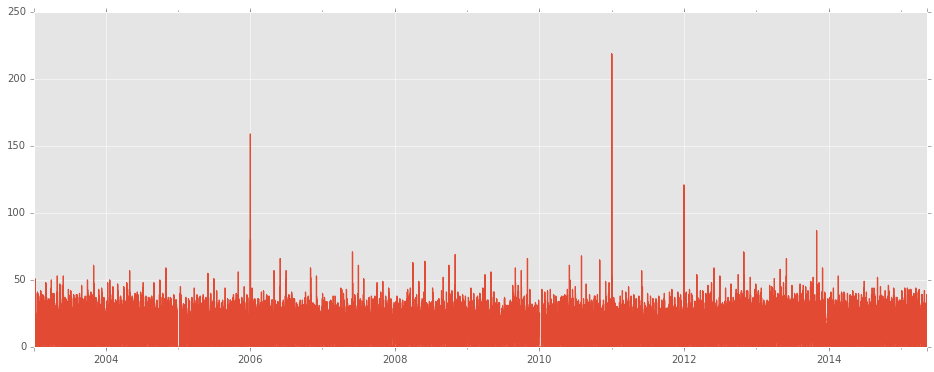

In [41]:
tsHourly = tsDetailed.resample('H').sum()
tsHourly.plot.area(figsize=(16,6))

And now to Daily

In [42]:
tsHourly.resample('D',how='sum')

/Users/mtimet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2003-01-06    400.0
2003-01-07    418.0
2003-01-08    528.0
2003-01-09    417.0
2003-01-10    399.0
2003-01-11    363.0
2003-01-12    324.0
2003-01-13      NaN
2003-01-14      NaN
2003-01-15      NaN
2003-01-16      NaN
2003-01-17      NaN
2003-01-18      NaN
2003-01-19      NaN
2003-01-20    414.0
2003-01-21    380.0
2003-01-22    458.0
2003-01-23    454.0
2003-01-24    466.0
2003-01-25    469.0
2003-01-26    341.0
2003-01-27      NaN
2003-01-28      NaN
2003-01-29      NaN
2003-01-30      NaN
2003-01-31      NaN
2003-02-01      NaN
2003-02-02      NaN
2003-02-03    424.0
2003-02-04    450.0
              ...  
2015-04-14    357.0
2015-04-15    446.0
2015-04-16    403.0
2015-04-17    450.0
2015-04-18    429.0
2015-04-19    444.0
2015-04-20      NaN
2015-04-21      NaN
2015-04-22      NaN
2015-04-23      NaN
2015-04-24      NaN
2015-04-25      NaN
2015-04-26      NaN
2015-04-27    386.0
2015-04-28    368.0
2015-04-29    439.0
2015-04-30    423.0
2015-05-01    379.0
2015-05-02    377.0


Something is going one:  
Alternate of dates with data and ones with none.   
It seems like they have split train/test sets by week

In [43]:
tsWeekly = tsHourly.resample('W',how='sum')
tsWeekly

/Users/mtimet/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2003-01-12    2849.0
2003-01-19       NaN
2003-01-26    2982.0
2003-02-02       NaN
2003-02-09    2993.0
2003-02-16       NaN
2003-02-23    2970.0
2003-03-02       NaN
2003-03-09    2967.0
2003-03-16       NaN
2003-03-23    2747.0
2003-03-30       NaN
2003-04-06    3036.0
2003-04-13       NaN
2003-04-20    2876.0
2003-04-27       NaN
2003-05-04    2855.0
2003-05-11       NaN
2003-05-18    2989.0
2003-05-25       NaN
2003-06-01    2852.0
2003-06-08       NaN
2003-06-15    2796.0
2003-06-22       NaN
2003-06-29    2807.0
2003-07-06       NaN
2003-07-13    2756.0
2003-07-20       NaN
2003-07-27    2746.0
2003-08-03       NaN
               ...  
2014-10-26       NaN
2014-11-02    2943.0
2014-11-09       NaN
2014-11-16    2896.0
2014-11-23       NaN
2014-11-30    2729.0
2014-12-07       NaN
2014-12-14    2752.0
2014-12-21       NaN
2014-12-28    2639.0
2015-01-04       NaN
2015-01-11    2892.0
2015-01-18       NaN
2015-01-25    2974.0
2015-02-01       NaN
2015-02-08    2933.0
2015-02-15   

In [53]:
ts = tsWeekly[1::2]
ts[-ts.isnull()]

2005-01-16    2934.0
2005-01-30    2734.0
2005-02-13    2634.0
2005-02-27    2617.0
2005-03-13    2737.0
2005-03-27    2711.0
2005-04-10    2810.0
2005-04-24    2775.0
2005-05-08    2771.0
2005-05-22    2857.0
2005-06-05    2798.0
2005-06-19    2562.0
2005-07-03    2775.0
2005-07-17    2672.0
2005-07-31    2636.0
2005-08-14    2676.0
2005-08-28    2745.0
2005-09-11    2589.0
2005-09-25    2834.0
2005-10-09    2977.0
2005-10-23    2830.0
2005-11-06    2971.0
2005-11-20    2790.0
2005-12-04    2564.0
2005-12-18    2526.0
2006-01-01    2837.0
2006-01-15    2682.0
2006-01-29    2593.0
2006-02-12    2791.0
2006-02-26    2746.0
               ...  
2008-11-16    3011.0
2008-11-30    2515.0
2008-12-14    2545.0
2008-12-28    2191.0
2009-01-11    2692.0
2009-01-25    2580.0
2009-02-08    2529.0
2009-02-22    2708.0
2009-03-08    2824.0
2009-03-22    2919.0
2009-04-05    2994.0
2009-04-19    2754.0
2009-05-03    2651.0
2009-05-17    2830.0
2009-05-31    2435.0
2009-06-14    2138.0
2009-06-28   